# 

## 1. Importing the libraries

In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.tokenize import word_tokenize, MWETokenizer

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 2. Importing the data

In [62]:
jobs_all= pd.read_csv('Job details by URL_LinkedIn.csv').replace("'","", regex=True)

In [63]:
jobs_all.description_tokens = jobs_all.Job_description.str.strip("[]").str.split(",")

In [64]:
jobs_all.describe()

,Keyword,Location,Job_title,Job_link,Company,Company_link,Job_location,Post_time,Applicants_count,Job_description,Seniority_level,Employment_type,Job_function,Industries
count,586,586,586,586,585,585,585,586,586,586,586,576,576,576
unique,2,1,325,575,234,234,124,33,106,447,3,5,35,76
top,Data Analyst,Canada,Analyste de données,https://ca.linkedin.com/jobs/view/analyst-flig...,\n Diverse Lynx\n,https://www.linkedin.com/company/diverselynx?t...,"\n Toronto, Ontario, Canada\n ...",\n \n\n \n \n \n \n \n ...,\n \n \n Be among...,"Work Location: Remote, candidates must be loca...",\n Entry level\n,\n Full-time\n,\n Information Technology\n,\n IT Services and IT Consulting\n ...
freq,585,586,36,2,60,60,176,146,300,36,576,328,335,143


In [65]:
jobs_all.head()

,Keyword,Location,Job_title,Job_link,Company,Company_link,Job_location,Post_time,Applicants_count,Job_description,Seniority_level,Employment_type,Job_function,Industries
0,Data Analyst,Canada,Data Analyst,https://ca.linkedin.com/jobs/view/data-analyst...,\n TouchTunes\n,https://www.linkedin.com/company/touchtunes-in...,"\n Montreal, Quebec, Canada\n ...",\n \n\n \n \n \n \n \n ...,\n \n \n Over 200...,\n Hybrid Montreal tech hub📌 Your missi...,\n Entry level\n,\n Full-time\n,\n Information Technology\n,\n Entertainment Providers\n
1,Data Analyst,Canada,Data Analyst,https://ca.linkedin.com/jobs/view/data-analyst...,\n Linkus Group\n,https://ca.linkedin.com/company/the-linkus-gro...,"\n Ontario, Canada\n",\n \n\n \n \n \n \n \n ...,\n 147 applicants\n,Looking for a Junior Data Analyst to join one ...,\n Entry level\n,\n Full-time\n,\n Information Technology\n,\n Staffing and Recruiting\n
2,Data Analyst,Canada,Data Analyst,https://ca.linkedin.com/jobs/view/data-analyst...,\n Tailscale\n,https://ca.linkedin.com/company/tailscale?trk=...,\n Canada\n,\n \n\n \n \n \n \n \n ...,\n \n \n Over 200...,We are looking for a Data Analyst to partner w...,\n Entry level\n,\n Full-time\n,\n Information Technology\n,\n Software Development\n
3,Data Analyst,Canada,Data Analyst,https://ca.linkedin.com/jobs/view/data-analyst...,\n Tailscale\n,https://ca.linkedin.com/company/tailscale?trk=...,\n Canada\n,\n \n\n \n \n \n \n \n ...,\n \n \n Over 200...,\n We are looking for a Data Analyst to...,\n Entry level\n,\n Full-time\n,\n Information Technology\n,\n Software Development\n
4,Data Analyst,Canada,Data Analyst,https://ca.linkedin.com/jobs/view/data-analyst...,\n Tailscale\n,https://ca.linkedin.com/company/tailscale?trk=...,\n Canada\n,\n \n\n \n \n \n \n \n ...,\n \n \n Over 200...,\n We are looking for a Data Analyst to...,\n Entry level\n,\n Full-time\n,\n Information Technology\n,\n Software Development\n


## 3. EDA: Title, Company, Location, Industry, Function Distributions

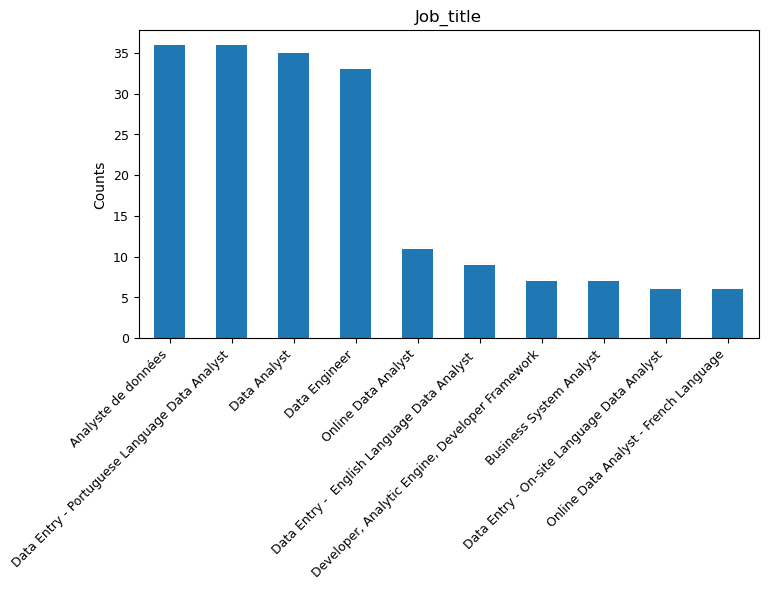

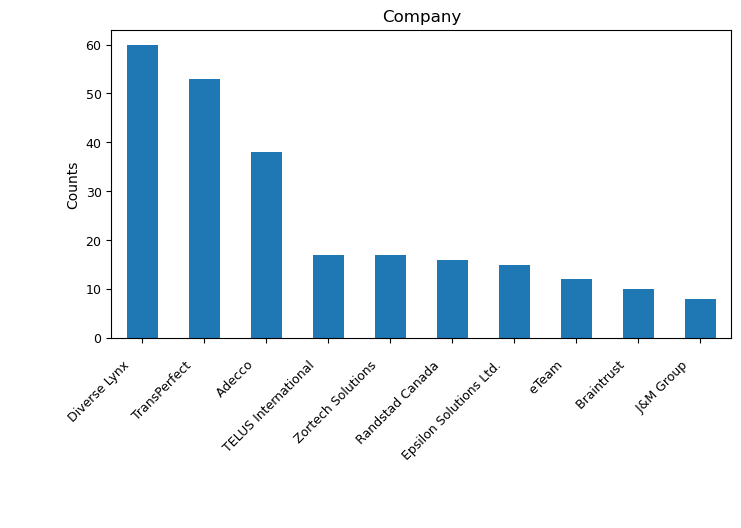

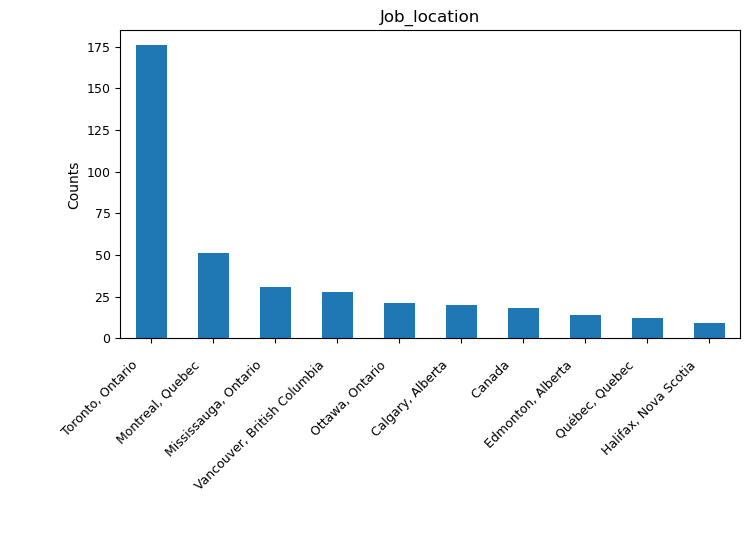

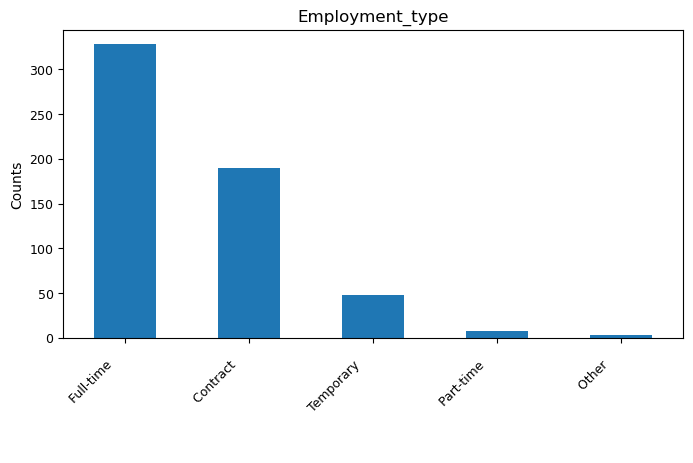

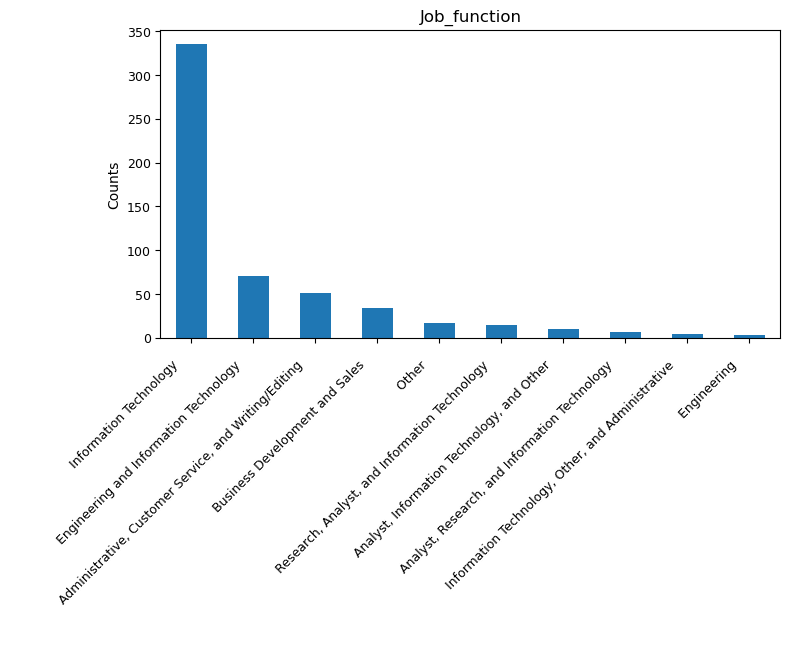

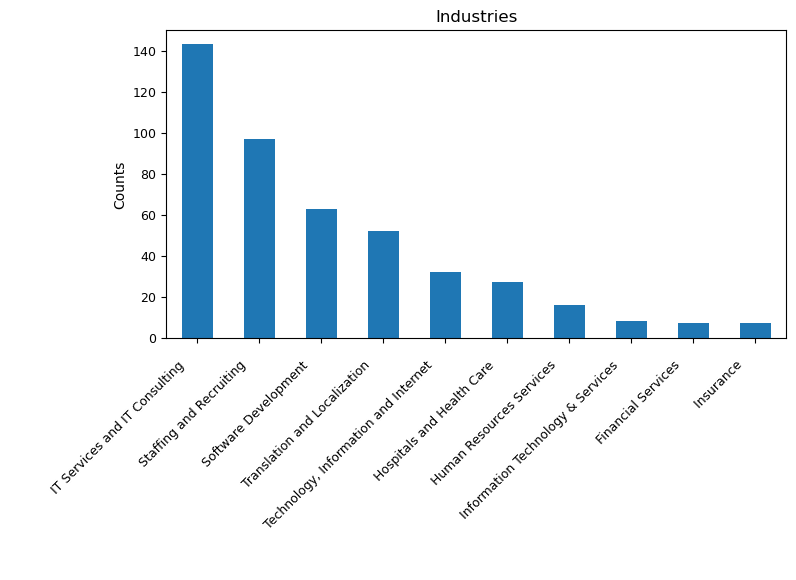

In [82]:
def eda_plot(column, topn=10):
    plt.figure(figsize=(8, 4))
    jobs_all[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"{column}")
    plt.ylabel("Counts")
    plt.xticks(rotation = 45, ha='right', fontsize=9)  # Set fontsize here for x-axis
    plt.yticks(fontsize=9)  # Set fontsize here for y-axis
    
    plt.show()

columns = ['Job_title', 'Company', 'Job_location', 'Employment_type', 'Job_function', 'Industries']

for column in columns:
    eda_plot(column)

## 4. Sought-after Languages and Tools

In [22]:
# Picked out keywords based on all keywords (only looked words with 100+ occurrences)
keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql', 
]

keywords_libraries = [
'scikit-learn', 'jupyter', 'theano', 'openCV', 'spark', 'nltk', 'mlpack', 'chainer', 'fann', 'shogun', 
'dlib', 'mxnet', 'node.js', 'vue', 'vue.js', 'keras', 'ember.js', 'jse/jee',
]

keywords_analyst_tools = [
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',
]

keywords_cloud_tools = [
'aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora',
]

# Not using
keywords_general_tools = [
'microsoft', 'slack', 'apache', 'ibm', 'html5', 'datadog', 'bloomberg',  'ajax', 'persicope', 'oracle', 
]

# Not using
keywords_general = [
'coding', 'server', 'database', 'cloud', 'warehousing', 'scrum', 'devops', 'programming', 'saas', 'ci/cd', 'cicd', 
'ml', 'data_lake', 'frontend',' front-end', 'back-end', 'backend', 'json', 'xml', 'ios', 'kanban', 'nlp',
'iot', 'codebase', 'agile/scrum', 'agile', 'ai/ml', 'ai', 'paas', 'machine_learning', 'macros', 'iaas',
'fullstack', 'dataops', 'scrum/agile', 'ssas', 'mlops', 'debug', 'etl', 'a/b', 'slack', 'erp', 'oop', 
'object-oriented', 'etl/elt', 'elt', 'dashboarding', 'big-data', 'twilio', 'ui/ux', 'ux/ui', 'vlookup', 
'crossover',  'data_lake', 'data_lakes', 'bi', 
]

keywords = keywords_programming + keywords_libraries + keywords_analyst_tools + keywords_cloud_tools 


In [23]:
jobs_all = jobs_all[jobs_all.Job_description.notnull()] # filter out null values
jobs_all = jobs_all.reset_index() # throwing index issues if don't reset index
# jobs_all = jobs_all.head(10) 


In [25]:
jobs_all['description_tokens'] = ""
for index, row in jobs_all.iterrows():
    # lowercase words
    detail = row.Job_description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization (e.g., 'Power BI')
    multi_tokens = [('power', 'bi'), ('data', 'lake'), ('data', 'lakes'), ('machine', 'learning'), ('objective', 'c'),
                    ('visual', 'basic')]
    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # filter for keywords only
    detail = [word for word in detail if word in keywords] 
    # replace duplicate keywords
    replace_tokens = {'powerbi' : 'power_bi', 'spreadsheets': 'spreadsheet'}
    for key, value in replace_tokens.items():
        detail = [d.replace(key, value) for d in detail]
    # add to details list # row.description_tokens = detail
    jobs_all.at[index, 'description_tokens'] = detail

In [26]:
def filtered_keywords(jobs_filtered, keywords, title="Keyword Analysis", head=10):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.description_tokens.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)

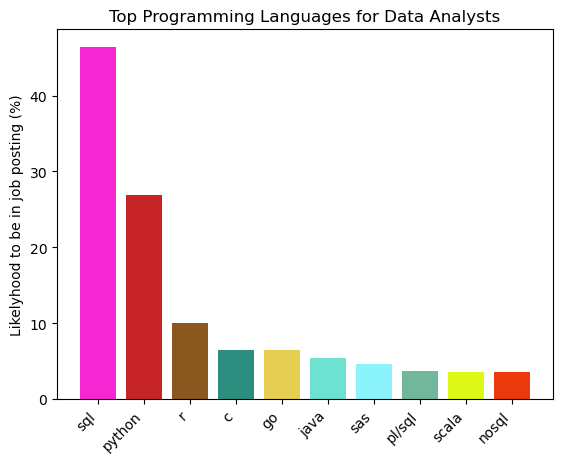

   keywords  counts  percentage
0       sql     272   46.416382
1    python     158   26.962457
6         r      59   10.068259
9         c      38    6.484642
10       go      38    6.484642
13     java      32    5.460751
17      sas      27    4.607509
20   pl/sql      22    3.754266
22    scala      21    3.583618
23    nosql      21    3.583618


In [27]:
filtered_keywords(jobs_all, keywords_programming, title="Top Programming Languages for Data Analysts")

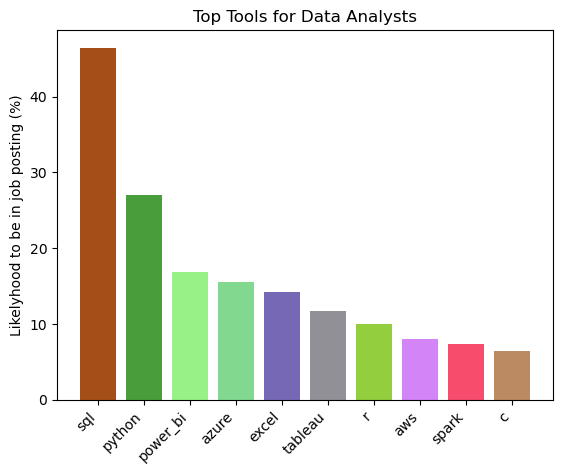

   keywords  counts  percentage
0       sql     272   46.416382
1    python     158   26.962457
2  power_bi      99   16.894198
3     azure      91   15.529010
4     excel      83   14.163823
5   tableau      69   11.774744
6         r      59   10.068259
7       aws      47    8.020478
8     spark      43    7.337884
9         c      38    6.484642


In [28]:
filtered_keywords(jobs_all, keywords, title="Top Tools for Data Analysts")

## 5. Frequently Mentioned Topics (LDA Topic Modelling)

In [29]:
jobs_all['description_tokens'].head()

0    [tableau, power_bi, sql, aws, python]
1                                  [excel]
2                                    [sql]
3                                    [sql]
4                                    [sql]
Name: description_tokens, dtype: object

In [30]:
import nltk 
import string
import re

In [31]:
jobs_all.columns

Index(['index', 'Keyword', 'Location', 'Job_title', 'Job_link', 'Company',
       'Company_link', 'Job_location', 'Post_time', 'Applicants_count',
       'Job_description', 'Seniority_level', 'Employment_type', 'Job_function',
       'Industries', 'description_tokens'],
      dtype='object')

#### Remove Punctuation

In [32]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text


jobs_all['jd_punct'] = jobs_all['Job_description'].apply(lambda x: remove_punct(x))
jobs_all[['jd_punct','Job_description']].head(10)

,jd_punct,Job_description
0,\n Hybrid Montreal tech hub📌 Your missi...,\n Hybrid Montreal tech hub📌 Your missi...
1,Looking for a Junior Data Analyst to join one ...,Looking for a Junior Data Analyst to join one ...
2,We are looking for a Data Analyst to partner w...,We are looking for a Data Analyst to partner w...
3,\n We are looking for a Data Analyst to...,\n We are looking for a Data Analyst to...
4,\n We are looking for a Data Analyst to...,\n We are looking for a Data Analyst to...
5,Job Description\n\n\n\n\nTitle Data Analyst\n...,Job Description\n\n\n\n\nTitle : Data Analyst\...
6,Staff Non Union\n\nJob Category\n\nMP AAPS\n...,Staff - Non Union\n\nJob Category\n\nM&P - AAP...
7,Great Baddow\n\nPermanent\n\nBrief\n\nData Ana...,Great Baddow\n\nPermanent\n\nBrief\n\nData Ana...
8,\n Great BaddowPermanentBriefData Analy...,\n Great BaddowPermanentBriefData Analy...
9,\n Great BaddowPermanentBriefData Analy...,\n Great BaddowPermanentBriefData Analy...


#### Tokenization

In [47]:
jobs_all = jobs_all[~jobs_all['Job_location'].str.contains("Quebec", case=False, na=False)]

In [48]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

jobs_all['jd_tokenized'] = jobs_all['jd_punct'].apply(lambda x: tokenization(x.lower()))
jobs_all[['jd_punct','jd_tokenized']].head(10)

,jd_punct,jd_tokenized
1,Looking for a Junior Data Analyst to join one ...,"[looking, for, a, junior, data, analyst, to, j..."
2,We are looking for a Data Analyst to partner w...,"[we, are, looking, for, a, data, analyst, to, ..."
3,\n We are looking for a Data Analyst to...,"[, we, are, looking, for, a, data, analyst, to..."
4,\n We are looking for a Data Analyst to...,"[, we, are, looking, for, a, data, analyst, to..."
6,Staff Non Union\n\nJob Category\n\nMP AAPS\n...,"[staff, non, union, job, category, mp, aaps, j..."
7,Great Baddow\n\nPermanent\n\nBrief\n\nData Ana...,"[great, baddow, permanent, brief, data, analys..."
8,\n Great BaddowPermanentBriefData Analy...,"[, great, baddowpermanentbriefdata, analyst, n..."
9,\n Great BaddowPermanentBriefData Analy...,"[, great, baddowpermanentbriefdata, analyst, n..."
10,\n Great BaddowPermanentBriefData Analy...,"[, great, baddowpermanentbriefdata, analyst, n..."
11,\n We are looking for data analyst who ...,"[, we, are, looking, for, data, analyst, who, ..."


#### Remove Stopwords

In [49]:
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [50]:
jobs_all['jd_nonstop'] = jobs_all['jd_tokenized'].apply(lambda x: remove_stopwords(x))
jobs_all.head(10)
jobs_all[['jd_nonstop','jd_tokenized']].head(10)

,jd_nonstop,jd_tokenized
1,"[looking, junior, data, analyst, join, one, to...","[looking, for, a, junior, data, analyst, to, j..."
2,"[looking, data, analyst, partner, marketing, s...","[we, are, looking, for, a, data, analyst, to, ..."
3,"[, looking, data, analyst, partner, marketing,...","[, we, are, looking, for, a, data, analyst, to..."
4,"[, looking, data, analyst, partner, marketing,...","[, we, are, looking, for, a, data, analyst, to..."
6,"[staff, non, union, job, category, mp, aaps, j...","[staff, non, union, job, category, mp, aaps, j..."
7,"[great, baddow, permanent, brief, data, analys...","[great, baddow, permanent, brief, data, analys..."
8,"[, great, baddowpermanentbriefdata, analyst, n...","[, great, baddowpermanentbriefdata, analyst, n..."
9,"[, great, baddowpermanentbriefdata, analyst, n...","[, great, baddowpermanentbriefdata, analyst, n..."
10,"[, great, baddowpermanentbriefdata, analyst, n...","[, great, baddowpermanentbriefdata, analyst, n..."
11,"[, looking, data, analyst, need, healthcare, e...","[, we, are, looking, for, data, analyst, who, ..."


#### Stemming and Lammitization

In [51]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

jobs_all['jd_stemmed'] = jobs_all['jd_nonstop'].apply(lambda x: stemming(x))
jobs_all[['jd_nonstop','jd_stemmed']].head(10)

,jd_nonstop,jd_stemmed
1,"[looking, junior, data, analyst, join, one, to...","[look, junior, data, analyst, join, one, toron..."
2,"[looking, data, analyst, partner, marketing, s...","[look, data, analyst, partner, market, sale, p..."
3,"[, looking, data, analyst, partner, marketing,...","[, look, data, analyst, partner, market, sale,..."
4,"[, looking, data, analyst, partner, marketing,...","[, look, data, analyst, partner, market, sale,..."
6,"[staff, non, union, job, category, mp, aaps, j...","[staff, non, union, job, categori, mp, aap, jo..."
7,"[great, baddow, permanent, brief, data, analys...","[great, baddow, perman, brief, data, analyst, ..."
8,"[, great, baddowpermanentbriefdata, analyst, n...","[, great, baddowpermanentbriefdata, analyst, n..."
9,"[, great, baddowpermanentbriefdata, analyst, n...","[, great, baddowpermanentbriefdata, analyst, n..."
10,"[, great, baddowpermanentbriefdata, analyst, n...","[, great, baddowpermanentbriefdata, analyst, n..."
11,"[, looking, data, analyst, need, healthcare, e...","[, look, data, analyst, need, healthcar, exper..."


In [52]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

In [53]:
jobs_all['jd_lemmatized'] = jobs_all['jd_nonstop'].apply(lambda x: lemmatizer(x))
jobs_all[['jd_stemmed','jd_lemmatized']].head(10)

,jd_stemmed,jd_lemmatized
1,"[look, junior, data, analyst, join, one, toron...","[looking, junior, data, analyst, join, one, to..."
2,"[look, data, analyst, partner, market, sale, p...","[looking, data, analyst, partner, marketing, s..."
3,"[, look, data, analyst, partner, market, sale,...","[, looking, data, analyst, partner, marketing,..."
4,"[, look, data, analyst, partner, market, sale,...","[, looking, data, analyst, partner, marketing,..."
6,"[staff, non, union, job, categori, mp, aap, jo...","[staff, non, union, job, category, mp, aaps, j..."
7,"[great, baddow, perman, brief, data, analyst, ...","[great, baddow, permanent, brief, data, analys..."
8,"[, great, baddowpermanentbriefdata, analyst, n...","[, great, baddowpermanentbriefdata, analyst, n..."
9,"[, great, baddowpermanentbriefdata, analyst, n...","[, great, baddowpermanentbriefdata, analyst, n..."
10,"[, great, baddowpermanentbriefdata, analyst, n...","[, great, baddowpermanentbriefdata, analyst, n..."
11,"[, look, data, analyst, need, healthcar, exper...","[, looking, data, analyst, need, healthcare, e..."


#### Topic Modelling

In [54]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from nltk.util import ngrams
from gensim import corpora, models

import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [55]:
# implement the LDA 
list_of_list_of_tokens = list(jobs_all['jd_lemmatized'])
dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens) 
dictionary_LDA.filter_extremes(no_below = 3) 
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

num_topics = 3 

%time lda_model = models.LdaModel(corpus, num_topics=num_topics, random_state=1, \
                                  id2word=dictionary_LDA, \
                                  passes=10, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

probs = [lda_model[corpus[i]] for i in list(range(len(jobs_all)))]

topic = [max(i, key = lambda x : x[1])[0] for i in probs]

jobs_all['topic'] = topic 

CPU times: user 5.43 s, sys: 9.35 ms, total: 5.43 s
Wall time: 5.45 s
0: 0.006*"company" + 0.005*"u" + 0.005*"analyst" + 0.005*"candidate" + 0.004*"world" + 0.004*"analytics" + 0.004*"provide" + 0.004*"product" + 0.004*"build" + 0.004*"language"

1: 0.008*"development" + 0.008*"database" + 0.007*"health" + 0.007*"application" + 0.007*"analysis" + 0.007*"information" + 0.006*"tool" + 0.006*"working" + 0.006*"using" + 0.006*"service"

2: 0.015*"de" + 0.006*"et" + 0.006*"client" + 0.005*"le" + 0.005*"working" + 0.005*"canada" + 0.005*"new" + 0.005*"community" + 0.004*"people" + 0.004*"design"

